First, let's import modules and write some utility plotting functions.

In [31]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

%matplotlib notebook

x_min, x_max, y_min, y_max = -5, 5, -5, 5
N = 100

def draw(x, y, ax, label=None, clear=True, xlim=(x_min, x_max), ylim=(x_min, x_max), c=None,
         xlabel=None, ylabel=None):
    if clear:
        ax.clear()
        ax.grid(True)
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        plt.axvline(x=0, c="black")
        plt.axhline(y=0, c="black")
        if xlabel is not None:
            plt.xlabel(xlabel)
        if ylabel is not None:
            plt.ylabel(ylabel)
    ax.scatter(x, y, label=label, c=c)
    if label is not None:
        plt.legend
        
def draw_line(x, y, ax, clear=True, xlim=(x_min, x_max), ylim=(x_min, x_max)):
    if clear:
        ax.clear()
        ax.grid(True)
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        plt.axvline(x=0, c="black")
        plt.axhline(y=0, c="black")
    ax.plot(x, y)

def display_slider(label, value=0):
    slider = widgets.FloatSlider(
        value=value, 
        min=-10, max=10, step=.1,
        description=label,
        continuous_update=True
    )
    slider.observe(update, 'value')
    display(slider)
    return slider

def display_text(value='', label='Loss'):
    text = widgets.HTML(
        value=str(value), 
        description=label
    )
    display(text)
    return text

def mse(y, y_pred):
    return ((y - y_pred) ** 2).mean().round(2)

Now, let's create some data.

In [32]:
import numpy as np
np.random.seed(0)

X = np.linspace(x_min, x_max, N)
w = 1
b = 0
w_pos = np.linspace(-2, 2, 10000)
noise = np.random.randn(N)

Create a simple a neural net and plot some losses for each possible weight.

In [33]:
def net(x=X, w=w, b=b):
    return w * x + b

y = net(X) + noise
losses = [mse(y, w * X + b) for w in w_pos]

Plot the data, decision boundary, and loss curve.

<IPython.core.display.Javascript object>


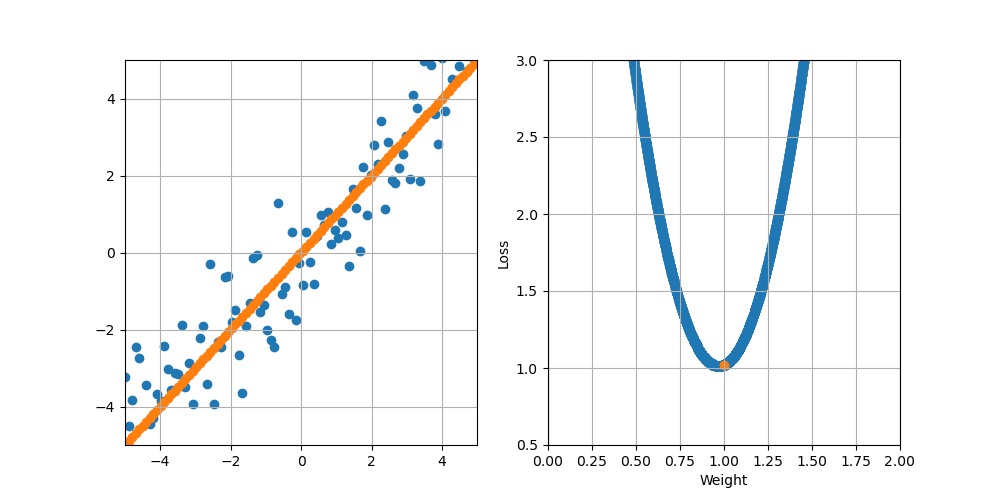

FloatSlider(value=0.0, description='Pred Weight', max=10.0, min=-10.0)

In [34]:
fig, ax = plt.subplots(figsize=(x_max * 2, y_max), nrows=1, ncols=2)
 
def update(change=None):
    y = net(X) + noise
    y_pred = net(X, weight_slider2.value)
    
    draw(X, y, ax[0])
    draw(X, y_pred, ax[0], clear=False)
    
    loss = mse(y, y_pred)
    
    draw(w_pos, losses, ax[1], xlim=(0, 2), ylim=(.5, 3), xlabel='Weight', ylabel='Loss')
    draw([weight_slider2.value], [loss], ax[1], clear=False, xlim=(0, 2), ylim=(.5, 3))
    
weight_slider2 = display_slider('Pred Weight')
update()

Create some linearly separable data for classification and plot its loss curve.

<IPython.core.display.Javascript object>


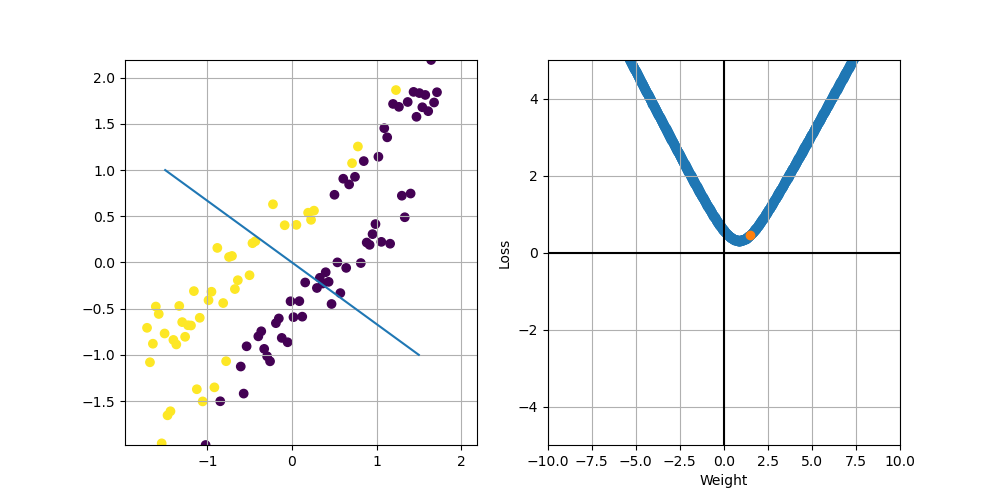

FloatSlider(value=2.0, description='Pred Weight 1', max=10.0, min=-10.0)

In [35]:
np.random.seed(0)

def log_loss(y, y_pred):
    num_samples = y_pred.shape[0]
    return -np.log(y_pred[range(num_samples), y]).mean()

x1 = np.linspace(x_min, x_max, N)
w = 1
b = 0

w_pos = np.linspace(-10, 10, 1000)
noise = np.random.randn(N)
noise[noise > 0] += 1
noise[noise <= 0] -= 1
y = (noise > 0).flatten().astype('i')

x2 = x1 * w + b + noise

X = np.vstack((x1, x2)).T
X = (X - X.mean(axis=0)) / X.std(axis=0)


def net(x, w=w, b=b):
    # X -> Logit
    scores = np.dot(x, w) + b

    # Logit -> Probability distribution
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    return probs

losses = [log_loss(y, net(X, w=[[w, -w], [-1, 1]], b=0)) for w in w_pos]
    
fig, ax = plt.subplots(figsize=(x_max * 2, y_max), nrows=1, ncols=2)
lim = (min(X.T[0].min(), X.T[1].min()), max(X.T[0].max(), X.T[1].max()))
    
def update(change=None):
    W = np.array([[weight_slider1.value, -weight_slider1.value], [-1, 1]])
    probs = net(X, w=W)
    y_pred = probs.argmax(1).astype('i')
    
    draw(X.T[0], X.T[1], ax[0], c=y_pred, xlim=lim, ylim=lim)
    draw_line(W[0], W[1], ax[0], clear=False, xlim=lim, ylim=lim)
    
    loss = log_loss(y, probs)
    draw(w_pos, losses, ax[1], xlim=(-10, 10), xlabel='Weight', ylabel='Loss')
    draw([W[0][0]], loss, ax[1], xlim=(-10, 10), clear=False)
    
weight_slider1 = display_slider('Pred Weight 1', value=2)

update()

<IPython.core.display.Javascript object>


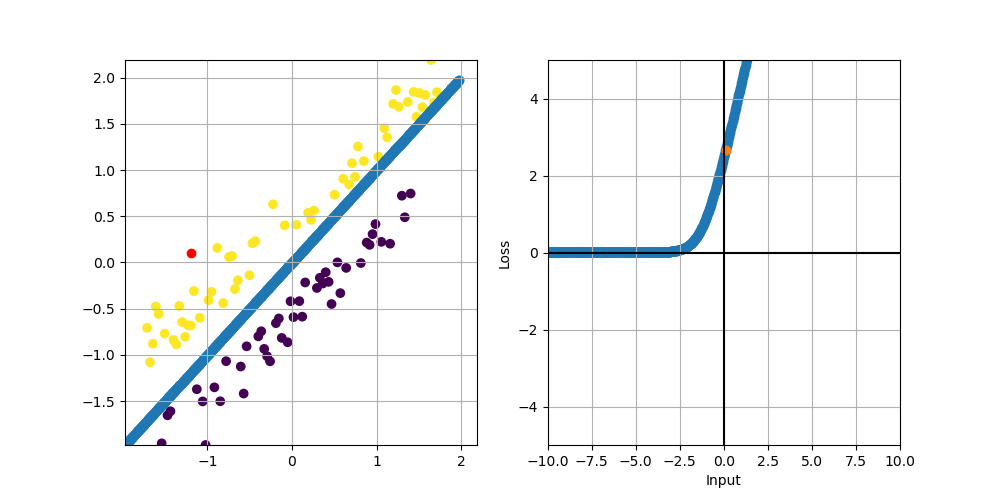

FloatSlider(value=-1.7, description='Y', max=10.0, min=-10.0)

In [37]:
target = [-1.2, -1.7]
target_class = np.array([0])

xy_offsets = np.linspace(-10, 10, 1000)

losses_x1 = [
    log_loss(
        target_class,
        net([[target[0], offset]],
            w=[[1, -1], [-1, 1]])) for offset in xy_offsets
]
losses_x2 = [
    log_loss(
        target_class,
        net([[offset, target[1]]],
            w=[[1, -1], [-1, 1]])) for offset in xy_offsets
]
    
fig, ax = plt.subplots(figsize=(x_max * 2, y_max), nrows=1, ncols=2)
    
def update(change=None):
    W = np.array([[1, -1], [-1, 1]])
    new_X = [target[0], y_slider.value]
    
    probs = net([new_X], w=W)
    
    draw(X.T[0], X.T[1], ax[0], c=y, xlim=lim, ylim=lim)
    draw(np.linspace(-lim[0], lim[0], 1000), np.linspace(-lim[0], lim[0], 1000),
                     ax[0], xlim=lim, ylim=lim, clear=False)
    draw(new_X[0], new_X[1], ax[0], c='red', xlim=lim, ylim=lim, clear=False)
    
    loss = log_loss(target_class, probs)
    draw(xy_offsets, losses_x1, ax[1], xlim=(-10, 10),
         xlabel='Input', ylabel='Loss')
    draw(new_X[1], loss, ax[1], xlim=(-10, 10), clear=False)
    
y_slider = display_slider('Y', value=target[1])

update()